<a href="https://colab.research.google.com/github/shanta-2000/Home-Loan-Prediction-using-SVM-with-multiple-appraoch/blob/main/home_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE475/LAB2/loan_sanction_train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
mode_value = df['Gender'].mode()[0]
mode_value

'Male'

In [7]:
df['Gender'] = df['Gender'].fillna(mode_value)

In [8]:
mode_value = df['Married'].mode()[0]
df['Married'] = df['Married'].fillna(mode_value)

In [9]:
mode_value = df['Dependents'].mode()[0]
df['Dependents'] = df['Dependents'].fillna(mode_value)

In [10]:
mode_value = df['Self_Employed'].mode()[0]
df['Self_Employed'] = df['Self_Employed'].fillna(mode_value)

In [11]:
median_value  = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(median_value)

In [12]:
median_value  = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(median_value)

In [13]:
mode_value = df['Credit_History'].mode()[0]
df['Credit_History'] = df['Credit_History'].fillna(mode_value)

In [14]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [15]:
df_copy = df.copy()

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['Gender'].value_counts()

,count
Gender,
Male,502
Female,112


In [18]:
# Define the mapping dictionary
gender_mapping = {
    'Male': 1,
    'Female': 2,
}

# Apply the mapping
df['Gender'] = df['Gender'].map(gender_mapping)

In [19]:
df['Married'].value_counts()

,count
Married,
Yes,401
No,213


In [20]:
# Define the mapping dictionary
Married = {"Yes":1,"No":0}

# Apply the mapping
df['Married'] = df['Married'].map(Married)

In [21]:
df['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [22]:
# Define the mapping dictionary
Education = {"Graduate":1,"Not Graduate":0}

# Apply the mapping
df['Education'] = df['Education'].map(Education)

In [23]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,532
Yes,82


In [24]:
# Define the mapping dictionary
Self_Employed = {"Yes":1,"No":0}

# Apply the mapping
df['Self_Employed'] = df['Self_Employed'].map(Self_Employed)

In [25]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [26]:
# Define the mapping dictionary
Property_Area = {"Semiurban":2,"Urban":1,"Rural":0}

# Apply the mapping
df['Property_Area'] = df['Property_Area'].map(Property_Area)

In [27]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [28]:
# Define the mapping dictionary
Loan_Status = {"Y":1,"N":0}

# Apply the mapping
df['Loan_Status'] = df['Loan_Status'].map(Loan_Status)

In [29]:
df['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [30]:
# Define the mapping dictionary
Dependents = {"3+":3,"1":1,"2":2,"0":0}

# Apply the mapping
df['Dependents'] = df['Dependents'].map(Dependents)

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [32]:
df.drop(columns=['Loan_ID'],inplace=True)

In [33]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [34]:
correlation = df.corr()
correlation

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.058809,-0.082912,-0.106904,0.074030,-0.009170,0.109521,-0.017987
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.007281,0.091478
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.001601,0.010118
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.066740,0.085884
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.007124,-0.003700
ApplicantIncome,-0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.017321,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.019087,-0.059187
LoanAmount,-0.106904,0.146546,0.163103,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.027714,-0.033214
Loan_Amount_Term,0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.016086,-0.022549
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.033102,0.540556


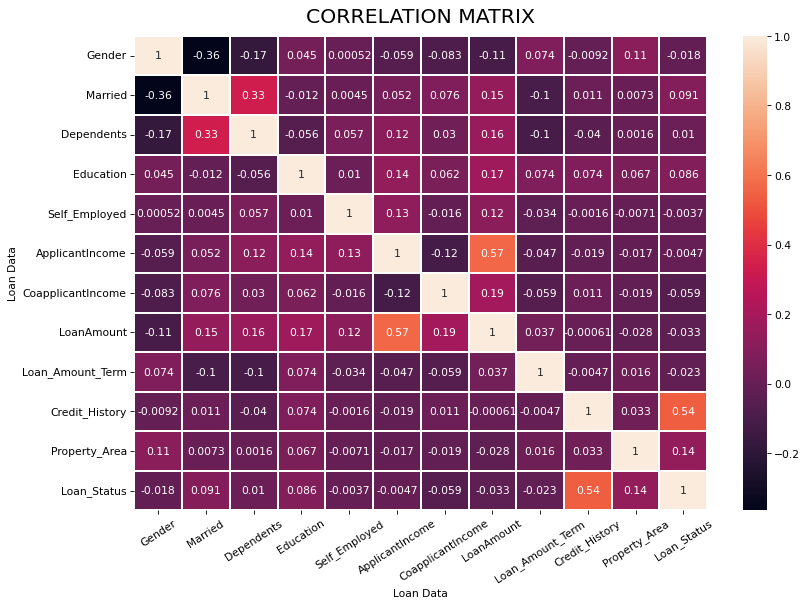

In [35]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Loan Data')
plt.ylabel('Loan Data')
plt.xticks(rotation=33)
plt.show()

<ipython-input-36-061d767d9d64>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df_copy, palette='viridis')


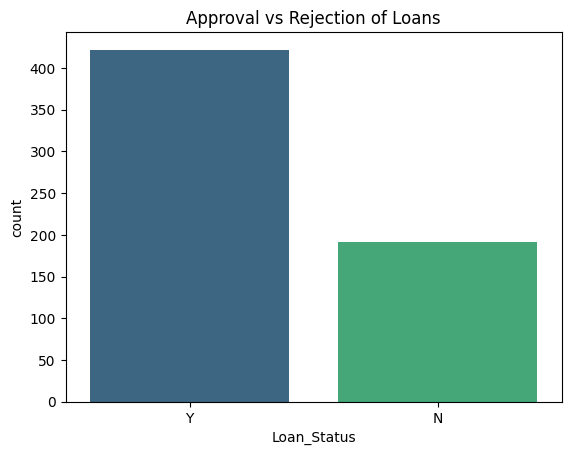

In [36]:
sns.countplot(x='Loan_Status', data=df_copy, palette='viridis')
plt.title('Approval vs Rejection of Loans')
plt.show()

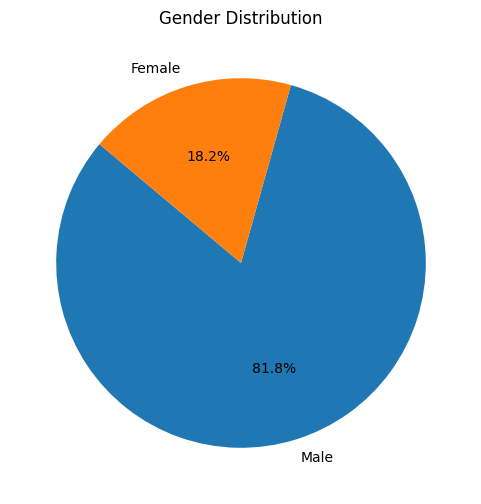

In [37]:
# Counting the number of males and females
gender_counts = df_copy['Gender'].value_counts()
gender_counts

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

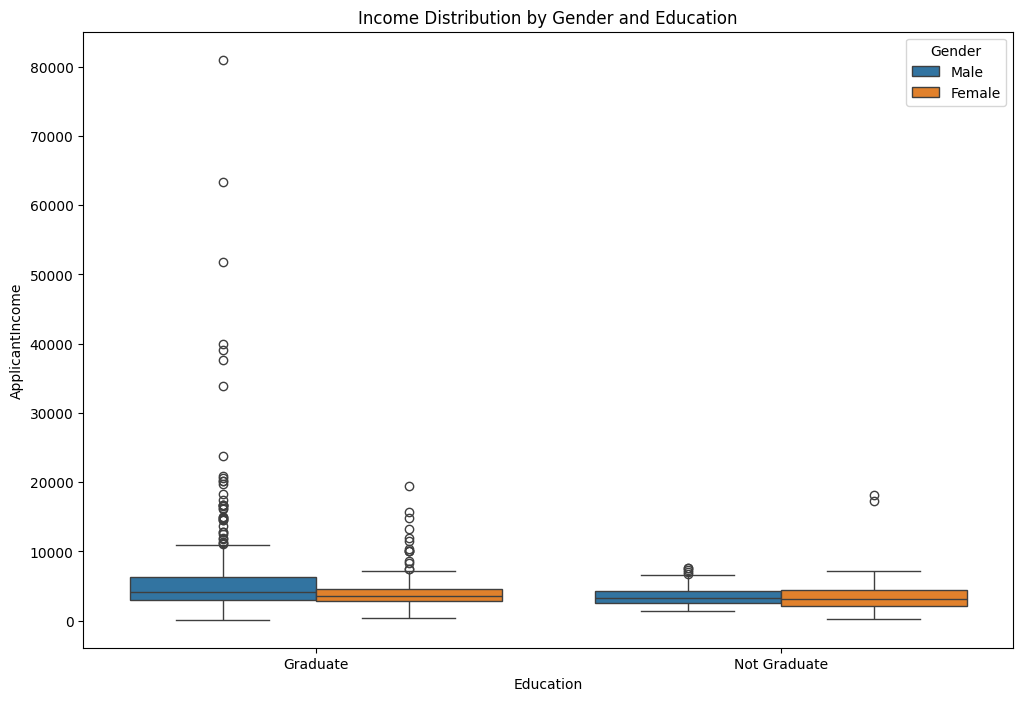

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='ApplicantIncome', hue='Gender', data=df_copy)

# Add a title and labels
plt.title('Income Distribution by Gender and Education')
plt.xlabel('Education')
plt.ylabel('ApplicantIncome')


# Display the plot
plt.show()

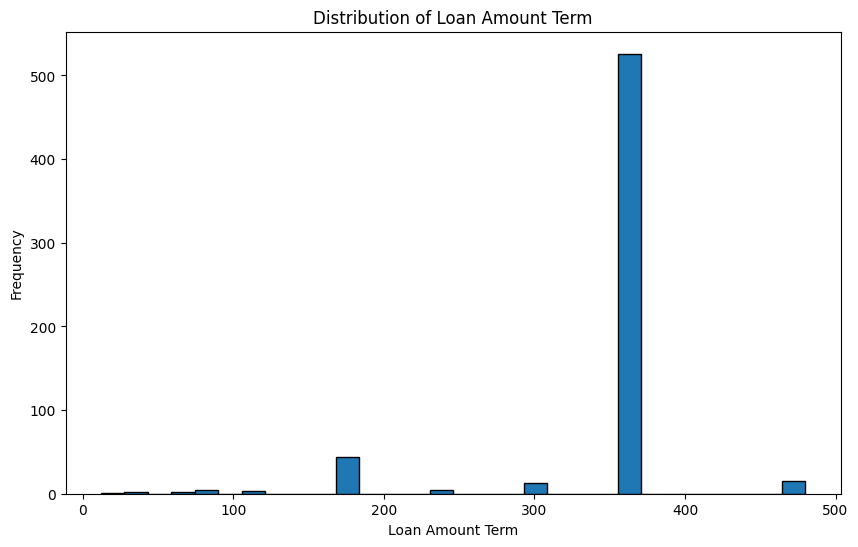

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Loan_Amount_Term'], bins=30, edgecolor='black')

# Add a title and labels
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [40]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **SVM**

First Approach with linear kernel only

In [42]:
from sklearn.svm import SVC

In [43]:
# Initialize the SVM model (with a linear kernel)

#A linear kernel in Support Vector Machines (SVM) is the simplest kernel function, used when the data is linearly separable.
#random_state=42: Ensures reproducibility of results.

model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.7642276422764228
Precision: 0.7339449541284404
Recall (Sensitivity): 1.0
F1-Score: 0.8465608465608465


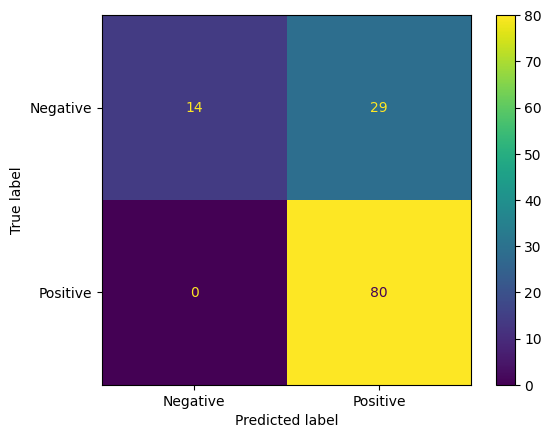

In [46]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

Second Approach using rbf kernel only

In [47]:
from sklearn.svm import SVC

In [48]:
# Initialize the SVM model (with a rbf kernel)

#kernel='rbf': Uses the Radial Basis Function (RBF) kernel, which helps capture non-linear decision boundaries.

model = SVC(kernel='rbf', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(random_state=42)

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.6504065040650406
Precision: 0.6504065040650406
Recall (Sensitivity): 1.0
F1-Score: 0.7881773399014779


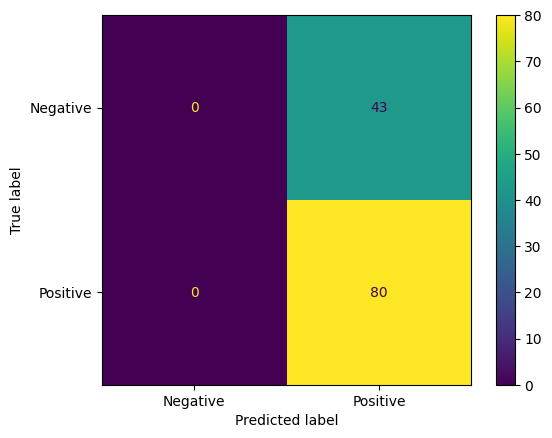

In [51]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

Third approach with some other parameter

In [52]:
from sklearn.svm import SVC

In [53]:
#C=1.0: Sets the regularization parameter, controlling the trade-off between a smooth decision boundary and correctly classifying training points.
#small c allows more misclassification, soft margin
#large c can lead to overfitting, hard margin

model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(random_state=42)

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.6504065040650406
Precision: 0.6504065040650406
Recall (Sensitivity): 1.0
F1-Score: 0.7881773399014779


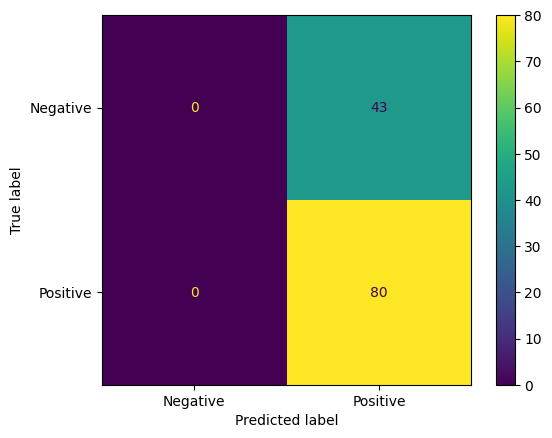

In [56]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

Changes From Here


In [57]:
#1st TRY
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1000, gamma=1000)

# Train the model
model.fit(X_train, y_train)

SVC(C=1000, gamma=1000, kernel='linear')

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.7804878048780488
Precision: 0.7476635514018691
Recall (Sensitivity): 1.0
F1-Score: 0.8556149732620321


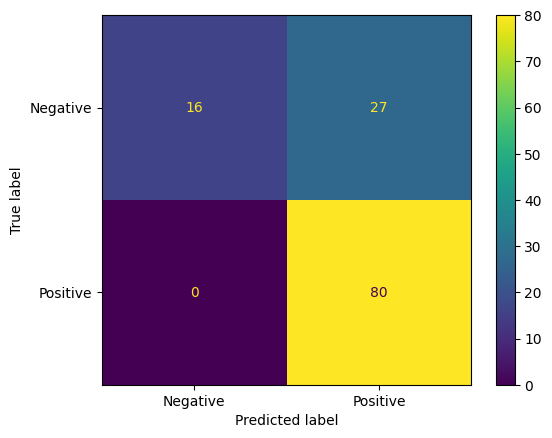

In [60]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

In [61]:
#2ND TRY
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1000,gamma=0.01)

# Train the model
model.fit(X_train, y_train)

SVC(C=1000, gamma=0.01)

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.6666666666666666
Precision: 0.6611570247933884
Recall (Sensitivity): 1.0
F1-Score: 0.7960199004975125


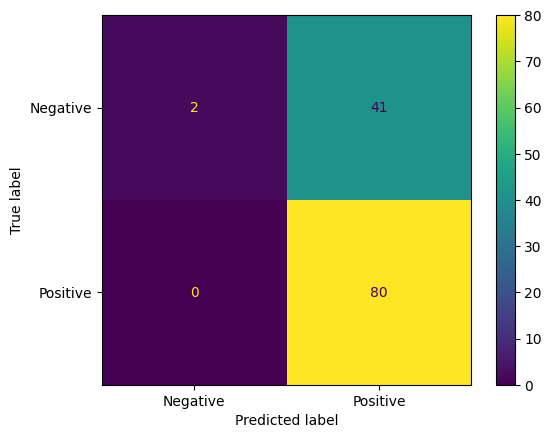

In [64]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

In [65]:
#3rd TRY
from sklearn.svm import SVC
model = SVC(kernel='sigmoid',C=1000,gamma=10)

# Train the model
model.fit(X_train, y_train)

SVC(C=1000, gamma=10, kernel='sigmoid')

In [66]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.6504065040650406
Precision: 0.6504065040650406
Recall (Sensitivity): 1.0
F1-Score: 0.7881773399014779


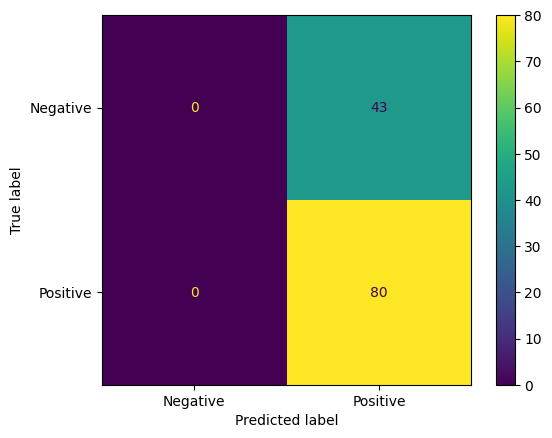

In [68]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

In [ ]:
#4th TRY
from sklearn.svm import SVC
model = SVC(kernel='poly',C=100,gamma=10,degree=4)

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

In [ ]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()